In [51]:
from sqlalchemy import URL, create_engine, text
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
MYSQL_DRIVER = "mysql+mysqlconnector"
MYSQL_USERNAME = "root"
MYSQL_PASSWORD = "XXXXXXXXXXX"
MYSQL_HOST_NAME = "localhost"
MYSQL_PORT = 3306
DB_NAME = "transfermarktdb"


url_object = URL.create(
    MYSQL_DRIVER,
    username=MYSQL_USERNAME,
    password=MYSQL_PASSWORD,
    host=MYSQL_HOST_NAME,
    port=MYSQL_PORT,
    database=DB_NAME,
)

engine = create_engine(url_object)

Number of Goals per League
** season 2021

In [55]:
with engine.connect() as conn:
    result = conn.execute(text('SELECT league_id, SUM(goal_for) AS goals FROM team_detail WHERE year = 2021 GROUP BY league_id ORDER BY goals DESC;'))

goals_2021 = pd.DataFrame(result.all())
goals_2021

,league_id,goals
0,IT1,1089
1,GB1,1071
2,FR1,1067
3,L1,954
4,ES1,951


Teams Total Market Value 2017-2021

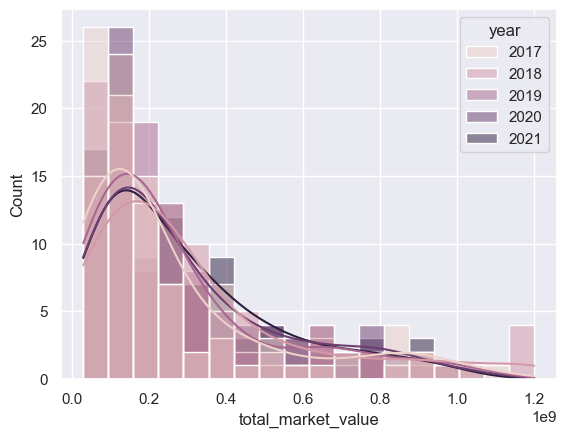

In [44]:
with engine.connect() as conn:
    result2017 = conn.execute(text(f"SELECT year, team.name, total_market_value FROM team_detail INNER JOIN team ON team_detail.team_id = team.id WHERE year=2017 ORDER BY total_market_value DESC;"))
    result2018 = conn.execute(text(f"SELECT year, team.name, total_market_value FROM team_detail INNER JOIN team ON team_detail.team_id = team.id WHERE year=2018 ORDER BY total_market_value DESC;"))
    result2019 = conn.execute(text(f"SELECT year, team.name, total_market_value FROM team_detail INNER JOIN team ON team_detail.team_id = team.id WHERE year=2019 ORDER BY total_market_value DESC;"))
    result2020 = conn.execute(text(f"SELECT year, team.name, total_market_value FROM team_detail INNER JOIN team ON team_detail.team_id = team.id WHERE year=2020 ORDER BY total_market_value DESC;"))
    result2021 = conn.execute(text(f"SELECT year, team.name, total_market_value FROM team_detail INNER JOIN team ON team_detail.team_id = team.id WHERE year=2021 ORDER BY total_market_value DESC;"))
team_tmv_2017 = pd.DataFrame(result2017.all())
team_tmv_2018 = pd.DataFrame(result2018.all())
team_tmv_2019 = pd.DataFrame(result2019.all())
team_tmv_2020 = pd.DataFrame(result2020.all())
team_tmv_2021 = pd.DataFrame(result2021.all())


df = pd.concat(axis=0, ignore_index=True, objs=[team_tmv_2017, team_tmv_2018, team_tmv_2019, team_tmv_2020, team_tmv_2021])


fig, ax = plt.subplots()
sns.histplot(
    data=df, x="total_market_value", hue='year', ax=ax, kde=True
);
